In [8]:
#const
import numpy as np

TOLERANCIA_RELATIVA = 0.05
TOLERANCIA_ABSOLUTA = 0.002
EPSILON_MAQUINA = np.finfo(float).eps


In [11]:
# Punto

import math

from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

def is_colineal(punto1, punto2, punto3):
    """
    Comprobar si tres puntos son colineales.
    está solución es precisa y exclusiva para float's, requiere una tol relativa y absoluta
    e ignora la alineación de puntos en pendientes de tipo: "indeterminadas" y "cero".
    Requiere una tolerancia relativa y absoluta.    
    """
    x1, y1 = punto1
    x2, y2 = punto2
    x3, y3 = punto3
    
    # En un entorno "real" usaría todo las "utilerias" de numpy/scipy para obtener el mejor performance 
    pendiente1 = (y2-y1) / (x2-x1)
    pendiente2 = (y3-y2) / (x3-x2)
    pendientediff = pendiente1 - pendiente2
    
    return (pendientediff <= TOLERANCIA_RELATIVA and pendientediff > TOLERANCIA_ABSOLUTA)


def is_colineal_con_origen(punto1, punto2, punto3, origen=Point(0, 0)):
    """
    Comprobar si tres puntos están alineados con respecto al origen.
    
    """
    x1, y1 = punto1
    x2, y2 = punto2
    x3, y3 = punto3
    x4, y4 = origen
    
    # todo pendiente probar con ecuación, por performance evito calculos por distancia.sqrt o area=0
    # todo, #debt DRY
    product1 = (x2 - x1)*(y3 - y1) - (x3 - x1)*(y2 - y1)
    
    if isclose(product1, 0, abs_tol=TOLERANCIA_RELATIVA):
        product2 =(x2 - x1)*(y4 - y1) - (x4 - x1)*(y2 - y1) 
        return isclose(product2, 0, abs_tol=TOLERANCIA_RELATIVA)
    
    return False


In [12]:
import logging
import numpy as np

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)


class Planeta:
    def __init__(self, nombre, velocidad, sol_distancia, giro_horario=True):
        self.nombre = nombre
        self.giro = -1 if giro_horario else 1
        self.velocidad = velocidad
        self.sol_distancia = sol_distancia
    
    def __str__(self):
        return "Planeta:{}. velocidad:{:d}".format(self.nombre, self.velocidad)
    
    @property
    def velocidad_angular(self):
        return self.velocidad * self.giro

    def get_posicion_dia(self, dia):
        angulo = (self.velocidad_angular * dia)
        return np.deg2rad(angulo)

    def get_coordenadas_dia(self, dia):
        pos = self.get_posicion_dia(dia)
        
        x = self.sol_distancia * np.sin(pos)
        y = self.sol_distancia * np.cos(pos)
        #logging.debug("Planeta:{}.  x={:f}, y={:f}".format(self.nombre, x, y))
        
        return Point(x, y)

<IPython.core.display.Javascript object>


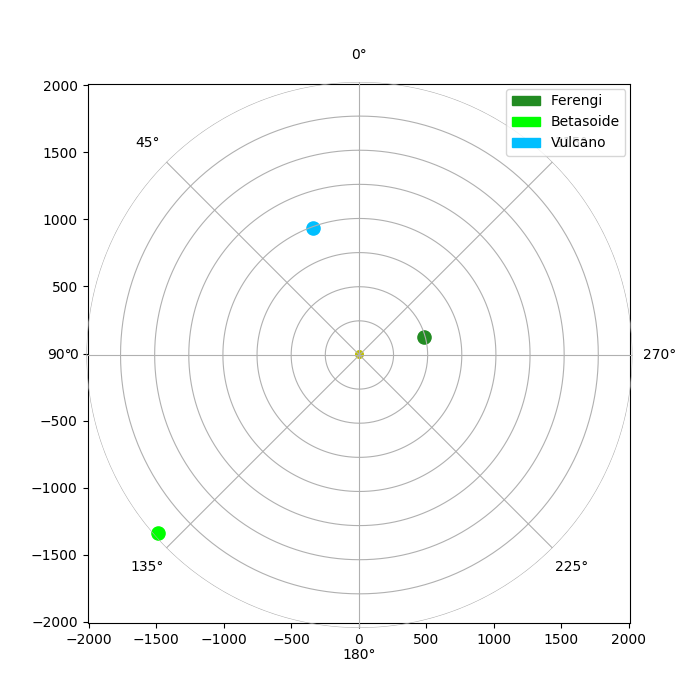

DEBUG:root:planeta!!-->485.147863, 120.960948
DEBUG:root:planeta!!-->-1486.289651, -1338.261213
DEBUG:root:planeta!!-->-342.020143, 939.692621


<module 'matplotlib.pyplot' from '/home/nicolas/MERCADOLIBRE/env/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [19]:
ferengi = Planeta(nombre='Ferengi', velocidad=1, sol_distancia=500)
vulcano = Planeta(nombre='Betasoide', velocidad=3, sol_distancia=2000)
betasoide = Planeta(nombre='Vulcano', velocidad=5, sol_distancia=1000, giro_horario=False)
dia = 284
planetas = [ferengi, vulcano, betasoide]
simulador = SimuladorGrafico(planetas)
simulador.simular_dia(dia)


<IPython.core.display.Javascript object>


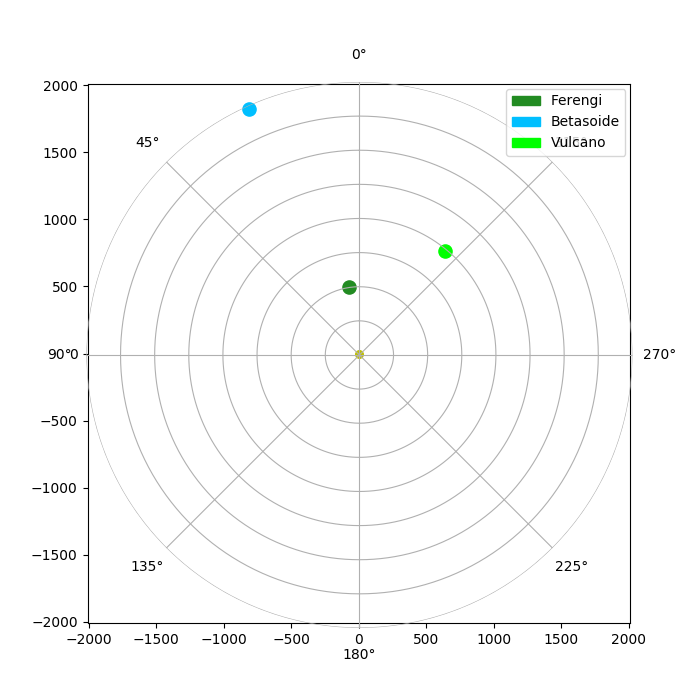

DEBUG:root:planeta!!-->-69.586550, 495.134034
DEBUG:root:planeta!!-->-813.473286, 1827.090915
DEBUG:root:planeta!!-->642.787610, 766.044443


<module 'matplotlib.pyplot' from '/home/nicolas/MERCADOLIBRE/env/lib/python3.5/site-packages/matplotlib/pyplot.py'>

<IPython.core.display.Javascript object>


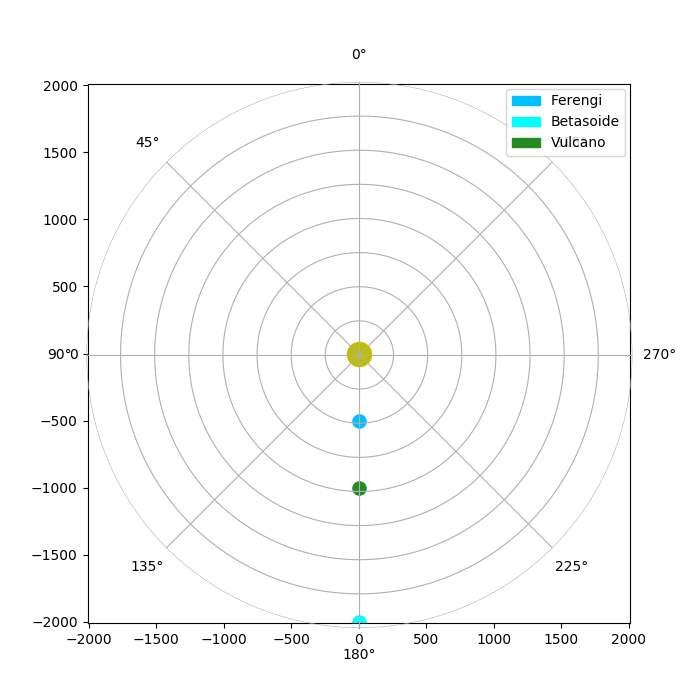

DEBUG:root:Planeta:Ferengi.  x=0.000000, y=-500.000000
DEBUG:root:planeta!!-->0.000000, -500.000000
DEBUG:root:Planeta:Betasoide.  x=0.000000, y=-2000.000000
DEBUG:root:planeta!!-->0.000000, -2000.000000
DEBUG:root:Planeta:Vulcano.  x=0.000000, y=-1000.000000
DEBUG:root:planeta!!-->0.000000, -1000.000000


<module 'matplotlib.pyplot' from '/home/nicolas/MERCADOLIBRE/env/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [13]:

dia = 19

x1, y1 = ferengi.get_coordenadas_dia(dia) 
x2, y2 = betasoide.get_coordenadas_dia(dia)
x3, y3 = vulcano.get_coordenadas_dia(dia)

pendiente1 = (22 * (y3-y1) /(x3-x1))
pendiente2 = (22 * (y2 - y3) / (x2-x3))


print(np.abs(pendiente1))
print(np.abs(pendiente2))


NameError: name 'Point' is not defined

print(pendiente1 -pendiente2)

In [5]:

%matplotlib notebook

#simulador.clima
from random import shuffle
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class SimuladorGrafico:
    def __init__(self, planetas):
        self.planetas = planetas
        self.color = np.arange(100)

    def simular_dia(self, dia):
        
        colores = ['purple' , 'deepskyblue', 'lime', 'forestgreen', 'aqua']
        
        fig, ax = plt.subplots()
        fig = matplotlib.pyplot.gcf()
        #fig.canvas.set_window_title("Posición planetas el día")
        fig.set_size_inches(7, 7)
        fig.savefig('galaxy.png', dpi=200)
        fig.set_size_inches(7, 7, forward=True)
        
        rect = [0.111, 0.1029, 0.8049, 0.78]
        
        # coordenadas polares
        ax_polar = fig.add_axes(rect, projection='polar', frameon=False)
        ax_polar.set_theta_zero_location("N") # Posición Norte.
        ax_polar.set_rmax(2000)
        ax_polar.set_yticklabels([])
        
        # limites plano cartesiano
        ax.set_xlim(-2010, 2010)
        ax.set_ylim(-2010, 2010)
        
        # Sol enano...
        ax.scatter(0, 0, color='y', s=30)
        
        legends = []
        
        for planeta in self.planetas:
            x, y = planeta.get_coordenadas_dia(dia)
            shuffle(colores)
            color = colores.pop()
            legends.append(mpatches.Patch(color=color, label=planeta.nombre)) 
            ax.scatter(x, y, s=90, color=color)
            logging.debug("planeta!!-->{:f}, {:f}".format(x, y))

        plt.legend(handles=legends)
        plt.show()
        return plt
        

False

In [10]:
"""
RESTA_-> 1.37518829334
14 0.428551575284 giro--> -1
-0.822427971692
RESTA_-> 1.25097954698
15 0.416977054675 giro--> -1
-0.724819210062
RESTA_-> 1.14179626474
16 0.408917659671 giro--> -1
-0.636002095626
RESTA_-> 1.0449197553
17 0.404016194622 giro--> -1
-0.554282394232
RESTA_-> 0.958298588854
18 0.402044994705 giro--> -1
-0.478325967312
RESTA_-> 0.880370962017
19 0.40288342024 giro--> 1
-0.40706210354
RESTA_-> 0.80994552378
20 0.406505506631 giro--> 1
-0.339615538155
"""




True

In [32]:
-0.554282394232 + -1

-1.554282394232

In [31]:
-0.822427971692 * -1

0.822427971692

In [28]:
-1.822427971692 < 0.001

-0.001554282394232

In [30]:
-0.001554282394232 < 0.001

True

In [26]:
-0.339615538155 * 1

-0.339615538155

In [38]:
-1.554282394232 > 0.1

False

In [37]:
0.822427971692 > 0.1

True

In [39]:
-0.478325967312 * 1

-0.478325967312

In [41]:
-0.478325967312 > 0.01

False